data sets: 
-----------------
   1. titanic_pandas
   2. gapminder - maternal_mortality_ratio_per_100000_live_births.csv


One of the most appropriate comics for this applied programming course: 
    
https://xkcd.com/2054/

or.... when my code shouldn't work but does anyway: 
https://i.imgur.com/0wH2jSc.gifv

and...(yeah, I can do this all day): 
https://www.reddit.com/r/ProgrammerHumor/comments/9u2cx6/updating_your_project_is_such_a_a_pain_sometimes/


Here are three articles that you may be interested in: 

Pandas creator, Wes McKinney, and why he created it: 
https://qz.com/1126615/the-story-of-the-most-important-tool-in-data-science/

** This is an enormous secret but if you manage to integrate this into your learning, you will be unstoppable in whatever career you pursue: storytelling, that is pulling a clear narrative out of messy data, is one of the most powerful and essential parts of being an effective scientist. We are hardwired to storytell as humans, and data science - and data visualization - is fundamentally about learning tools that help you tease out the 'story' of your data.  Learning to tell stories (note: not lies or anecdotes but powerful cohesive explanations of the patterns in the data that are accessible to your audience) is one of the most important and valued skills you will develop as scientists. It is also one of the hardest. PANDAS STRENGTH IS THAT IT MAKES IT AS EASY AS POSSIBLE FOR YOU TO LEARN THE DIFFICULT SKILL OF TRANSFORMING YOUR DATA INTO A COMPELLING STORY.** 

How popular is pandas and why? 
https://stackoverflow.blog/2017/09/14/python-growing-quickly/

and....drumroll.... the 2017 O'Reilly "Data Science Salary Survey" (AKA: part of the reason that I force you to learn the stuff that I force you to learn):

https://www.oreilly.com/data/free/files/2017-data-science-salary-survey.pdf?mkt_tok=eyJpIjoiTkRCallqQTJZakl4TmpRMCIsInQiOiJIT0dcL3BITUtKTjN0S0tyOTRwTnlEb0toVUFmSk5JZ1FYUTBYT0Z4VWRrOWxKWjBcL3FZMmtaK2FaaFRXVGNJOWtuSTJBMTI5VTB1U2ZkdHZydkNidytlRm83UGdpSmJ2YVYyd3psNmxuUVoydGRzMW5cL3VcL0EyVG9qdnRaYWxoY0QifQ%3D%3D


## Moving on...working through examples

* handy, dandy cheat sheet for pandas: http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

* We need to save our files in csv (comma separated format) or tsv (tab separated format with the default argument delimiter='\t'). If using tab separated data, you will need to use the argument in the pd.read_csv(file_name,delimiter='\t').I have included some publicly available data sets from the famous data visualization website gapminder.org. In case you don't know this was the data visualization project of the late Hans Rosling who gave probably the most effective TED talk of all time (https://www.gapminder.org/videos/hans-rosling-ted-talk-2007-seemingly-impossible-is-possible/). Data visualization is THE MOST EFFECTIVE TOOL THAT YOU HAVE AT YOUR DISPOSAL; use it responsibly, please! You can find the data (download  maternal mortality (under the health tab) and child death located here: https://www.gapminder.org/data/

* note that the maternal mortality file has columns that are each year (1800, 1850, 2013 etc). This is a problem for Pandas because it doesn't *like* names that are numbers so a bunch of functionality is reduced. Since we will be interested in 2013 data (the most recent), I have modified the name of that column to be year2013. Weird, I know, but Pandas has some likes and dislikes. Sorry! Besides, these likes/dislikes might change at some point in the near future - that is just one of the many awesome aspects of open source software. 

* pandas documentation here: http://pandas.pydata.org/pandas-docs/stable/

1. We are going to read in the file contents and save files. 
    * We are going to properly read in the file contents by assigning the file contents to a variable so that we can access them in memory by simply calling the super easy variable name

2. We will see some basic tools of data exploration (.head(), .tails(), .info(), shape etc), sort_values(), mean(), median()

3. We will subset our data using slicing and loc() versus iloc()
    * there is a straightforward explanation (in my opinion) of the difference between loc() and iloc() here - https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

4. We will delete columns and rows and learn how to concatenate dataframes

5. split-apply-combine methods like groupby and aggregate
    

In [2]:
# import with conventional alias of pd (note: we might want to put the full data analasys library stack here)
import pandas as pd
# read in the maternal mortality (per 100,000 women giving birth)
# -------------------------------------------------
# compare to the mm dataframe which is indexed in the default way
mm= pd.read_csv('/Users/daniellepresgraves/mypython/maternal_mortality_ratio_per_100000_live_births.csv')
#print(mm)
# THIS DATA SET has the index set explicitly by country 
# (the geo column). Keep this difference in mind!
mm_country = pd.read_csv('/Users/daniellepresgraves/mypython/maternal_mortality_ratio_per_100000_live_births.csv',index_col="geo")
print(mm_country)

             1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
geo                                                                      ...   
Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Algeria       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Venezuela     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Vietnam       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Yemen         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zambia        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zimbabwe      NaN   NaN   NaN   NaN   Na

In [32]:
#-------------------------------------------------
# you can input this in directly from the web as well: 
url='https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv'
trial_url = pd.read_csv(url)
#print(trial_url)
# .sample() is doing what? 
print(trial_url.sample())
trial_url.head()
# -------------------------------------------------
#note that you may need to use other arguments depending on your data type. For instance, 
# you can assign column names by using a list like so: names=['a', 'b', 'c','d','e']
# you will need to do this on one of your problem sets
#-------------------------------------------------

    country  year           pop continent  lifeExp    gdpPercap
707   India  2007  1.110396e+09      Asia   64.698  2452.210407


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [35]:
# we can also create dataframes. For instance: 
breed=["Chihuahua","Golden Retriever","Cocker Spaniel","Basenji","Greyhound"]
avg_life_span=[18,11,13,11,11]
#zip up these lists to create a list of tuples
dogs=list(zip(breed,avg_life_span))
print(dogs)
#transform the tuples into a dataframe
dogs_data = pd.DataFrame(data = dogs, columns=['Breeds', 'Avg_life_span'])
print(dogs_data)
print("***"*10)
dogs_data_2 = pd.DataFrame(data = dogs)
print(dogs_data_2)

#We can export this newly created pandas dataframe to a cvs file!
dogs_data.to_csv('dogs_data_test',index=False,header=False)
# Let's check that this file now exists in the same place 
# where we put this lecture file

[('Chihuahua', 18), ('Golden Retriever', 11), ('Cocker Spaniel', 13), ('Basenji', 11), ('Greyhound', 11)]
             Breeds  Avg_life_span
0         Chihuahua             18
1  Golden Retriever             11
2    Cocker Spaniel             13
3           Basenji             11
4         Greyhound             11
******************************
                  0   1
0         Chihuahua  18
1  Golden Retriever  11
2    Cocker Spaniel  13
3           Basenji  11
4         Greyhound  11


In [37]:
# we can peek at the data by using the head - default is first 6 rows  - and tails- default is last 6 rows
print(mm.head())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(mm.tail(9))
#we can see column names - remember that this is an ATTRIBUTE NOT A METHOD so no ()
print(mm.columns)

           geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

   2004   2005  2006  2007  2008  2009   2010  2011  2012  year2013  
0   NaN  730.0   NaN   NaN   NaN   NaN  500.0   NaN   NaN     400.0  
1   NaN   24.0   NaN   NaN   NaN   NaN   21.0   NaN   NaN      21.0  
2   NaN  100.0   NaN   NaN   NaN   NaN   92.0   NaN   NaN      89.0  
3   NaN    NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN       NaN  
4   NaN  750.0   NaN   NaN   NaN   NaN  530.0   NaN   NaN     460.0  

[5 rows x 215 columns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
               geo  

In [21]:
# we can peek at the data by using the head - default is first 6 rows  - and tails- default is last 6 rows
print(mm_country.head())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(mm_country.tail())
#we can see column names - remember that this is an ATTRIBUTE NOT A METHOD so no ()
print(mm_country.columns)


             1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
geo                                                                      ...   
Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Algeria       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andorra       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

             2004   2005  2006  2007  2008  2009   2010  2011  2012  year2013  
geo                                                                            
Afghanistan   NaN  730.0   NaN   NaN   NaN   NaN  500.0   NaN   NaN     400.0  
Albania       NaN   24.0   NaN   NaN   NaN   NaN   21.0   NaN   NaN      21.0  
Algeria       NaN  100.0   NaN   NaN   NaN   NaN   92.0   NaN   NaN      89.0  
Andorra       NaN    NaN   NaN   NaN   

In [12]:
# it's good practice to get some basics of data exploration out of the way before we get too deep
# let's ensure that this is, in fact, a dataframe
print(type(mm))
# then we can look at it's dimensions - like we did in NumPy!
# be careful - the temptation based on practice is to treat shape as a method. 
# However, it isn't! It is an attribute!
# so you can't use the regular format, ie. mm.shape() or Jupyter will throw an exception!
print(mm.shape)

<class 'pandas.core.frame.DataFrame'>
(187, 215)


In [13]:
#we can get more complete summary information about our data object using info() method. This combines some of the 
# features above. 
# this method includes the names of the columns. 
mm.info()
# VERY USEFUL for summary descriptive statistics
mm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 215 entries, geo to year2013
dtypes: float64(214), object(1)
memory usage: 314.2+ KB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,year2013
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.0,2.000000,2.000000,...,0.0,182.000000,0.0,0.0,0.0,0.0,182.000000,0.0,0.0,182.000000
mean,860.500000,837.500000,855.000000,813.000000,772.000000,755.00000,812.000000,866.0,940.500000,1070.000000,...,NaN,219.335165,NaN,NaN,NaN,NaN,183.445055,NaN,NaN,165.730769
std,50.204581,3.535534,18.384776,8.485281,24.041631,123.03658,76.367532,NaN,98.287843,84.852814,...,NaN,293.515297,NaN,NaN,NaN,NaN,242.537289,NaN,NaN,219.313240
min,825.000000,835.000000,842.000000,807.000000,755.000000,668.00000,758.000000,866.0,871.000000,1010.000000,...,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000
25%,842.750000,836.250000,848.500000,810.000000,763.500000,711.50000,785.000000,866.0,905.750000,1040.000000,...,NaN,18.250000,NaN,NaN,NaN,NaN,18.750000,NaN,NaN,15.250000
50%,860.500000,837.500000,855.000000,813.000000,772.000000,755.00000,812.000000,866.0,940.500000,1070.000000,...,NaN,71.000000,NaN,NaN,NaN,NaN,71.500000,NaN,NaN,67.500000
75%,878.250000,838.750000,861.500000,816.000000,780.500000,798.50000,839.000000,866.0,975.250000,1100.000000,...,NaN,327.500000,NaN,NaN,NaN,NaN,257.500000,NaN,NaN,237.500000
max,896.000000,840.000000,868.000000,819.000000,789.000000,842.00000,866.000000,866.0,1010.000000,1130.000000,...,NaN,1600.000000,NaN,NaN,NaN,NaN,1200.000000,NaN,NaN,1100.000000


### IN LECTURE exercise: Let's take a look at the titanic dataset 

* if you are in Bio 218P you have already had your fill of the titanic dataset but we are, after all, trying to 
demonstrate that you can use python tools to get much of the functionality of R so....sorry?

1. download titanic

titanic_data = pd.read_csv("titanic_pandas.csv")

2. let's do some data peeking

a. how many rows and columns?
b. can we look into the last 12 rows?

## Here is where the second half of the 4Cii video started!

In [64]:
#sorting the data: 
#print(mm_country.sort_index())
#by a particular column:
#print("-----------------------------------------")
sorted_country_2013 = mm_country.sort_values(by="year2013")
#send it to an external file called "countries_ascending_2013.csv"
sorted_country_2013.to_csv('countries_ascending_2013.csv')
print(sorted_country_2013)

                      1800   1801   1802   1803   1804   1805   1806  1807  \
geo                                                                          
Belarus                NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Israel                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Poland                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Finland              825.0  835.0  868.0  807.0  789.0  842.0  758.0   NaN   
Norway                 NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
...                    ...    ...    ...    ...    ...    ...    ...   ...   
Andorra                NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Antigua and Barbuda    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Dominica               NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Marshall Islands       NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Seychelles             NaN    NaN    NaN    NaN    NaN    NaN   

### In Lecture Exercise: Back to titanic

1. how to sort the data set by gender
2. how about survival? Survival is coded as: 0 (died),1 (survived)
* in the disaster, 1502 total died and 722 survived. 

# Subsetting the data
Much like Numpy, pandas is great at slicing the data which is particular important with large datasets. We are often intereseted in only some of the information. 

### Columns:
#### subsetting:

In [42]:
# subset (select) a single column
country = mm['geo']
# print out the entire column.
print(country)
#subset multiple columns: 
country_multi=mm[['geo','year2013']]
print(country_multi)
print("~~~~~~~~~~~I know we are talking about columns but note that this is really easy with rows too~~~~~~~~~~~~~~~")
#print out just the first three rows - althought this will be better with iloc and loc. 
print(mm[0:3])

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
182      Venezuela
183        Vietnam
184          Yemen
185         Zambia
186       Zimbabwe
Name: geo, Length: 187, dtype: object
             geo  year2013
0    Afghanistan     400.0
1        Albania      21.0
2        Algeria      89.0
3        Andorra       NaN
4         Angola     460.0
..           ...       ...
182    Venezuela     110.0
183      Vietnam      49.0
184        Yemen     270.0
185       Zambia     280.0
186     Zimbabwe     470.0

[187 rows x 2 columns]
~~~~~~~~~~~I know we are talking about columns but note that this is really easy with rows too~~~~~~~~~~~~~~~
           geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [66]:
print("~~~~***********~~~~~~~~")
#now we just want to focus on the year2013
# Here is a different way, instead of using ['year2013'], to select
# a column, use the .year2013 syntax:
#mm['year2013']
year2013_mm_country = mm_country.year2013
print(year2013_mm_country)
print("~~~~~~~~~~~~~~~")
# even simpler but remember: we haven't parked the results of this command anywhere so
# it isn't as easy to search for the object later.
print(mm.geo.head())
print(mm.geo.tail())
print("~~~~~~~~~~~~~~~")
# subset multiple columns: NOTE: 
# ------------------------------
# we always need to include double brackets here since this is now a 
# multi-dimensional object or, more simply, a dataframe not a series
# ------------------------------
print(mm[['geo', '1850', 'year2013']].tail(15))

~~~~***********~~~~~~~~
geo
Afghanistan    400.0
Albania         21.0
Algeria         89.0
Andorra          NaN
Angola         460.0
               ...  
Venezuela      110.0
Vietnam         49.0
Yemen          270.0
Zambia         280.0
Zimbabwe       470.0
Name: year2013, Length: 187, dtype: float64
~~~~~~~~~~~~~~~
0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: geo, dtype: object
182    Venezuela
183      Vietnam
184        Yemen
185       Zambia
186     Zimbabwe
Name: geo, dtype: object
~~~~~~~~~~~~~~~
                      geo   1850  year2013
172                Turkey    NaN      20.0
173          Turkmenistan    NaN      61.0
174                Uganda    NaN     360.0
175               Ukraine    NaN      23.0
176  United Arab Emirates    NaN       8.0
177        United Kingdom  548.0       8.0
178         United States    NaN      28.0
179               Uruguay    NaN      14.0
180            Uzbekistan    NaN      36.0
181            

In [45]:
# If we try to add a column that doesn't exist, it will fill it 
# in with NaN. In the case below, '2014' does not exist in the
# data set
mm2 = pd.DataFrame(mm,columns=('1950','1970','1990','2000','year2013','2014'))
print(mm2.head(10))

#we could also use the numpy method: np.arange() to fill in an empty column

    1950  1970    1990    2000  year2013  2014
0    NaN   NaN  1200.0  1100.0     400.0   NaN
1    NaN   NaN    31.0    28.0      21.0   NaN
2    NaN   NaN   160.0   120.0      89.0   NaN
3    NaN   NaN     6.2     6.3       NaN   NaN
4    NaN   NaN  1400.0  1100.0     460.0   NaN
5    NaN   NaN    49.7    25.2       NaN   NaN
6    NaN   NaN    71.0    63.0      69.0   NaN
7    NaN   NaN    47.0    43.0      29.0   NaN
8  109.0  20.6     7.0     9.0       6.0   NaN
9    NaN   NaN    10.0     5.0       4.0   NaN


In [46]:
#we can do the same analysis for the dataframe that is indexed 
# by country
mm_country2 = pd.DataFrame(mm_country,columns=('1950','1970','1990','2000','year2013'))
print(mm_country2.head(10))

                      1950  1970    1990    2000  year2013
geo                                                       
Afghanistan            NaN   NaN  1200.0  1100.0     400.0
Albania                NaN   NaN    31.0    28.0      21.0
Algeria                NaN   NaN   160.0   120.0      89.0
Andorra                NaN   NaN     6.2     6.3       NaN
Angola                 NaN   NaN  1400.0  1100.0     460.0
Antigua and Barbuda    NaN   NaN    49.7    25.2       NaN
Argentina              NaN   NaN    71.0    63.0      69.0
Armenia                NaN   NaN    47.0    43.0      29.0
Australia            109.0  20.6     7.0     9.0       6.0
Austria                NaN   NaN    10.0     5.0       4.0


## Displaying data using pandas
* Not only can we subset our data, we can plot it easily as well 
* plots over all the columns which, in this case where each row is a country, is inappropriate. 
* note - we aren't even using matplotlib here! just standard pandas). I SHOULD note, though, that standard pandas
 does run matplotlib 'under the hood' which is why it is just as messy as matplotlib.

* An excellent overview of popular plots can be found here: 
    http://wavedatalab.github.io/datawithpython/visualize.html

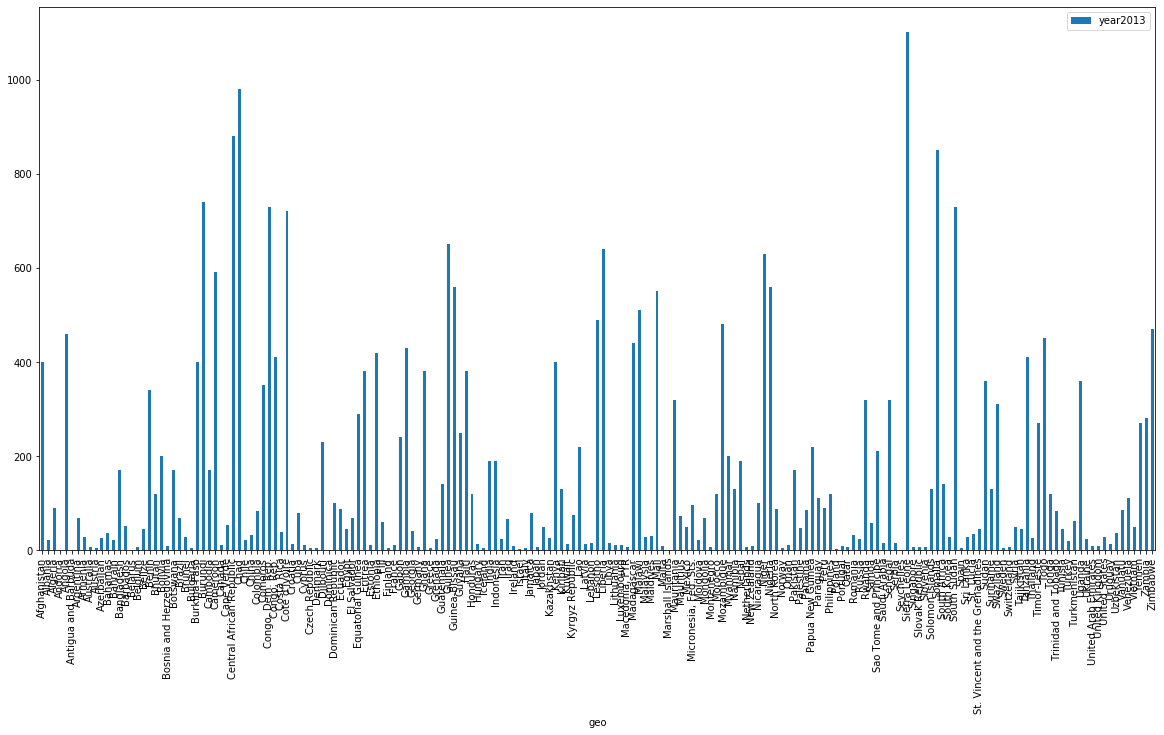

In [51]:
ax=mm[['geo', 'year2013']].plot.bar(x="geo",y="year2013",figsize=(20,10))
#note: there are ways of using the seaborn package - which we don't
# really see in this course but you will likely encounter if you use
# pandas - to construct a prettier plot and magnify the axes

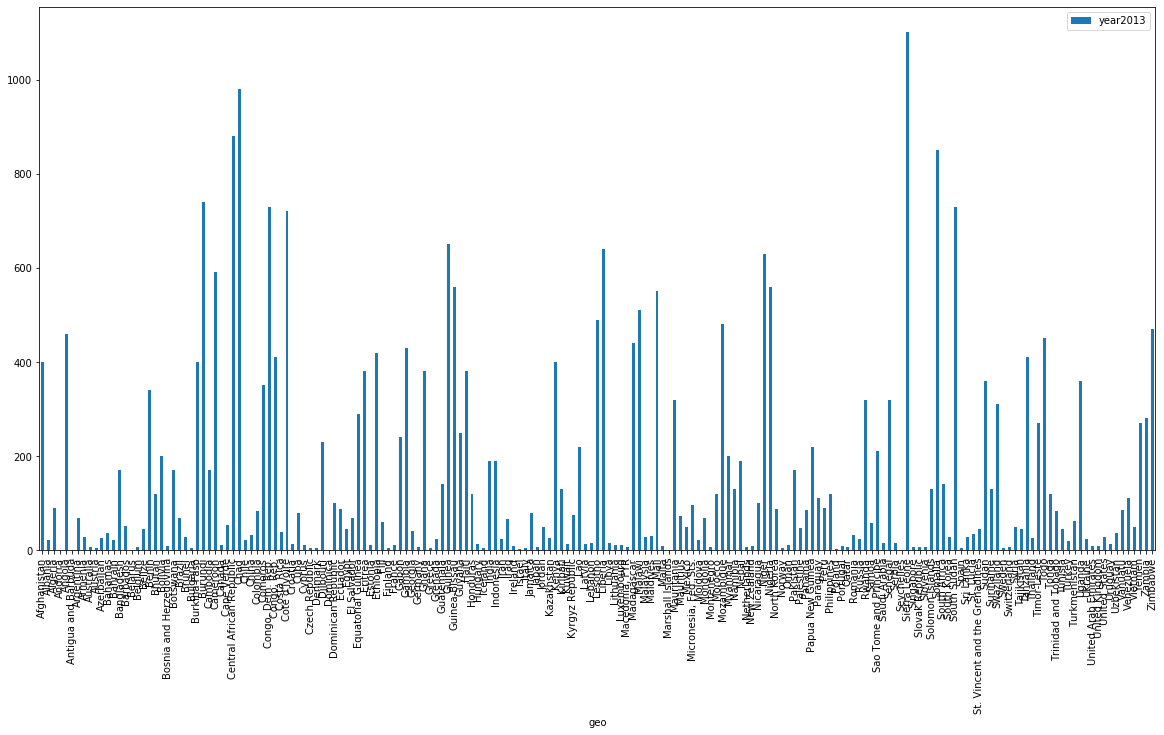

In [68]:
# There are SOOOOO many things wrong with this plot but
# we can see that pandas and matplotlib are tighly linked 
# and we can even put the results of the 
#graph into a different output file!

import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

mm.plot(kind='bar',x='geo',y='year2013',ax=ax,figsize=(20,10))

#plt.show()

# the plot gets saved to 'output.png'
plt.savefig('year2013.png')

One of the most important aspects of data science is uncovering 'the story'....

Let's have a closer look at our data. 

                1920   1930   1935   1940   1945   1950   1955   1960  1965  \
geo                                                                           
Canada           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
United States  799.0  673.0  582.0  376.0  207.0   83.0   47.0   37.1  31.6   
Sweden         401.0  348.0  256.0  216.0  133.0   61.5   49.4   38.2  13.8   
Mexico           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Ireland        487.0  477.0  467.0  367.0  237.0  156.0  114.0   57.6  28.3   
France           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   
Germany          NaN    NaN    NaN    NaN    NaN    NaN  153.0  106.0  69.3   
Netherlands    240.0  333.0  293.0  235.0  194.0  105.0   61.0   38.4  25.1   
Finland        360.0  327.0  242.0  477.0  402.0  146.0  105.0   71.8  25.7   

               1970  1975   1980  1985  1990  1995  2000  2005  2010  year2013  
geo                                              

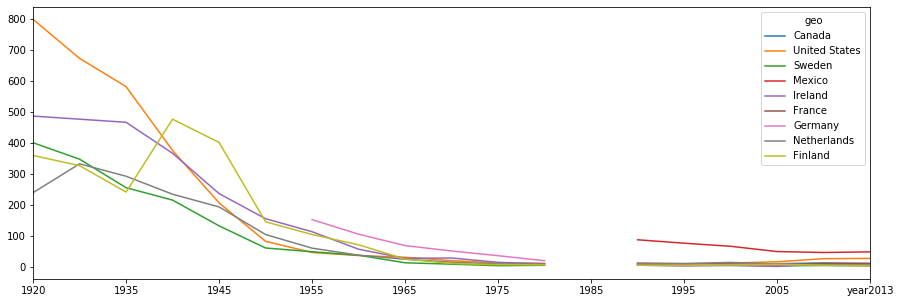

In [58]:
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'
# Let's slice this data up a bit.
country_slice = mm_country.loc[["Canada","United States","Sweden","Mexico","Ireland","France","Germany","Netherlands","Finland"],["1920","1930","1935","1940","1945","1950","1955","1960","1965","1970","1975","1980","1985","1990","1995","2000", "2005", "2010","year2013"]]
#Because the default of pandas is to connect each plot in a column
# which wouldn't be correct for time series data, 
# I have cheated here and transposed the dataframe so that
# each column is the country and the rows are the dates
print(country_slice)
country_slice.T.plot()
plt.show()
# ---------------------------
# WHAT HAPPENED, say, BETWEEN approx 1930 AND 1950?????
# suspiciously: THE SAME PHENOMENON HAPPENED IN OTHER COUNTRIES.....
# ---------------------------

               1975   1980  1990  1995  2000  2005  2010  year2013
geo                                                               
Canada          NaN    7.5   6.0   7.0   7.0  11.0  13.0      11.0
United States  13.2   12.2  12.0  11.0  13.0  17.0  27.0      28.0
Sweden          4.4    5.8   6.0   5.0   5.0   4.0   5.0       4.0
Mexico          NaN  124.0  88.0  77.0  67.0  50.0  47.0      49.0
Ireland        15.2   10.6   6.0   4.0   6.0   2.0  10.0       9.0
France          NaN   19.0  12.0  11.0  10.0   9.0  12.0      12.0


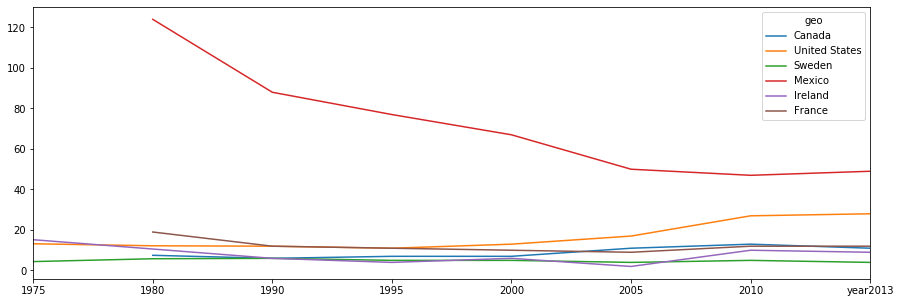

In [59]:
even_smaller_country_slice=mm_country.loc[["Canada","United States","Sweden","Mexico","Ireland","France"],["1975","1980","1990","1995","2000", "2005", "2010","year2013"]]
print(even_smaller_country_slice)
even_smaller_country_slice.T.plot()
plt.show()

#### deleting columns

In [ ]:
# delete columns
# this will drop a column in-place --- as in: 
# it changes the actual dataframe, mm. BE CAREFUL. 
del mm['geo']  
print(mm.head())
# you can see the country column - 'geo' -  is now gone

### Rows
#### how to select rows (which are usually individual observations)

* besides just using []

1. loc --> by index/row *label* (counting usually starts at 0 unless you have explicitly provided a different index)
2. iloc --> by position

* if you haven't provided an index these two methods will sometimes behave similarly since the labels and index will be the same
* I found myself constantly looking the difference between iloc and loc so I found a stack overflow that has an illuminating example: https://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation-how-are-they-different

In [60]:
### `loc`
# It is easier to understand loc if we use the mm_country data 
# that has the index be the geo columns. Remember that we simply
# set it up that way when we defined the mm_country dataframe.
# this demonstrates that we can search by string ie. country name
print(mm_country.loc["Canada"])

print("-------------------")

#print(mm_country.loc["Sweden"])
print("-------------------")
# Here I am specifying country - rows - and only one particular year - column.
print(mm_country.loc[["Canada","France","Sweden","United States"],'year2013'])


1800         NaN
1801         NaN
1802         NaN
1803         NaN
1804         NaN
            ... 
2009         NaN
2010        13.0
2011         NaN
2012         NaN
year2013    11.0
Name: Canada, Length: 214, dtype: float64
-------------------
-------------------
geo
Canada           11.0
France           12.0
Sweden            4.0
United States    28.0
Name: year2013, dtype: float64


In [61]:
### `iloc`

#This is the "index location" and actually uses position instead
# of the index/label so you SHOULD be able to use 
# negative integering with this method.
print("~~~~~~~~~~~~~~~~~~")
print(mm.iloc[0])
print("******************")
print(mm.iloc[99])
print("~~~~~~~~~~~~~~~~~~")
# SUPER COOL WAY OF SLICING THE DATA!
# Canada, US and Sweden in 2013
print(mm.iloc[[30,178,161],[214]])
# The last row in our data set is: 
print(mm.iloc[-1])

# We can slice rows: 
print(mm.iloc[0:3,:])
#we can slice columns
print(mm.iloc[:,0:3])

~~~~~~~~~~~~~~~~~~
geo         Afghanistan
1800                NaN
1801                NaN
1802                NaN
1803                NaN
               ...     
2009                NaN
2010                500
2011                NaN
2012                NaN
year2013            400
Name: 0, Length: 215, dtype: object
******************
geo         Madagascar
1800               NaN
1801               NaN
1802               NaN
1803               NaN
               ...    
2009               NaN
2010               480
2011               NaN
2012               NaN
year2013           440
Name: 99, Length: 215, dtype: object
~~~~~~~~~~~~~~~~~~
     year2013
30       11.0
178      28.0
161       4.0
geo         Zimbabwe
1800             NaN
1801             NaN
1802             NaN
1803             NaN
              ...   
2009             NaN
2010             610
2011             NaN
2012             NaN
year2013         470
Name: 186, Length: 215, dtype: object
           geo  1800  1801  

In [62]:
# retrieve a particular value: afghanistan in 2013
print(mm.iloc[0,214])
print(mm_country.loc["Afghanistan","year2013"])

400.0
400.0


### Now we bring rows and columns together: 
How to subset rows and columns.
1. the bracket notation: rows in first bracket and columns to be included in the second set of brackets
2. row subsetter
3. comma
4. column subsetter

* grouping first, followed by statistical methods
* groupby
* aggregate

In [69]:
# ---------------------------------------------------------------------------------------
# items to the left of the comma are ROWS and items to the 
# right of the comma are COLUMNS
# ---------------------------------------------------------------------------------------
# I choose the 3 rows that are located at index 0,99 and -1 
# and columns 0,3 and the most up to date year
print(mm.iloc[[0, 99, -1], [0, 3, -1]])
# if you want to include ALL of the columns put: 
# to the left of the comma, or if you want to specify
# ALL of the rows,:
# What is we just want the data on the United States and Canada?  
print("************************************")
# Canada, sweden and US for year 2013
print(mm.iloc[[30,161,178],214])
print("************************************")
# we might want to place the next three slices into variables
# and print them out to see how the maternal mortality compares 

             geo  1802  year2013
0    Afghanistan   NaN     400.0
99    Madagascar   NaN     440.0
186     Zimbabwe   NaN     470.0
************************************
30     11.0
161     4.0
178    28.0
Name: year2013, dtype: float64
************************************


In [70]:
# ------------------
# BOOLEAN CONDITIONS
# ------------------
#mortality changes over time
USA=mm.loc[mm.geo == 'United States']
print(USA)
print("****")
# even though you end up with the same information, data for the US,
#the results don't look the same. 
USA1=mm_country.loc["United States",:]
print(USA1)
print("~~~~~~~~~~~~~~~~~~~~~~~~~")
#CAN =mm.loc[mm.geo == 'Canada']
#print(CAN)
#SWEDEN =mm.loc[mm.geo == 'Sweden']
print("~~~~~~~~~~~~~~~~~~~~~~~~~")
#print(SWEDEN)

               geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
178  United States   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2004  2005  2006  2007  2008  2009  2010  2011  2012  year2013  
178   NaN  17.0   NaN   NaN   NaN   NaN  27.0   NaN   NaN      28.0  

[1 rows x 215 columns]
****
1800         NaN
1801         NaN
1802         NaN
1803         NaN
1804         NaN
            ... 
2009         NaN
2010        27.0
2011         NaN
2012         NaN
year2013    28.0
Name: United States, Length: 214, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~


In [63]:
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


### MORE in-lecture titanic data:
1. how many children survived who were 5 or under years old? 
2. How many children 5 or under were on the titanic in the first place?
3. How many children 5 or under survived and print out their class, sex and age

In [72]:
# we should RELOAD the original file so we still have 
# the 'geo' column. 
mm = pd.read_csv('/Users/daniellepresgraves/mypython/maternal_mortality_ratio_per_100000_live_births.csv')
# we'll use .tail() this time since we used .head() previously. 
# You can see that we can change the default by suppying an argument
print(mm.tail(8))
# you can also use the drop method but with this method you have to 
# specify the vertical axis
# since the default is the row axis.
# additionally, you have to save the results of this drop into a new
# object or it doesn't save the deletion of the column. 
# This is an important point because it means that it doesn't 
# modify the original dataframe!
mmdrop1 = mm.drop('geo',axis=1)
# we can see that the .drop method has worked.
print("let's see drop in action:")
print(mmdrop1.head())
# in contrast to numpy arrays....
print("~~~~~~The original dataframe hasn't been modified though ~~~~~~~" )
print(mm.head())

            geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
179     Uruguay   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
180  Uzbekistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
181     Vanuatu   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
182   Venezuela   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
183     Vietnam   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
184       Yemen   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
185      Zambia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
186    Zimbabwe   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2004   2005  2006  2007  2008  2009   2010  2011  2012  year2013  
179   NaN   32.0   NaN   NaN   NaN   NaN   23.0   NaN   NaN      14.0  
180   NaN   44.0   NaN   NaN   NaN   NaN   40.0   NaN   NaN      36.0  
181   NaN  100.0   NaN   NaN   NaN   NaN   90.0   NaN   NaN      86.0  
182   NaN

In [73]:
### `loc`

# To see the first row - which should be Afghanistan- REMEMBER THAT
# COUNTING STARTS AT 0
print(mm.loc[0])

print("-------------------")
# 100th row - should be Madagascar
print(mm.loc[99])
print("-------------------")
# THIS IS PARTICULARLY USEFUL: YOU CAN SLICE OUT THE FIRST 2 ROWS 
# AND SPECIFY CERTAIN COLUMNS
print(mm.loc[0:3,["geo","year2013"]])
# Usually you can count backwards like the example that is hashed 
# out but in Pandas this will fail 
#because it is using the row label not the actual count/index.
# you should be able to use it with .iloc though....
#mm.loc[-1]

#pull out a column and calculate built in methods like mean().
# We're doing something a little fancy here. I want to know what
# the most recent mean for maternal mortality is
# across all countries. We can use the .iloc method to slice out 
# the last column by using -1....in case at some point in the future
# this data base is updated. 
print("-----------------------------------")
Most_recent_mean = mm.iloc[:,-1].mean()
print("The most recent mean rate per 100,000 births of maternal mortality is: " +str(Most_recent_mean))
print("-----------------------------------")
# you could also get a mean over all the rows - country: 
print("---------****** Country Mean *******---------------")
country_mean = mm_country.mean(axis=1)
print(country_mean)
print("---------******Country Median *******---------------")
# or...median
Most_recent_median=mm.iloc[:,-1].median()
print("The most recent MEDIAN rate per 100,000 births of maternal mortality is: "+ str(Most_recent_median))
# --------------------------------------------------------------------------------------------
# remember that comparing the median and mean tells you something 
# pretty useful. WHAT IS THAT?
# --------------------------------------------------------------------------------------------
print("-----------------------------------")
#want to just return all the countries with maternal mortality that
# is over the mean value basically answering the question: which
# countries are doing the worst job at keeping pregnant women alive?

geo         Afghanistan
1800                NaN
1801                NaN
1802                NaN
1803                NaN
               ...     
2009                NaN
2010                500
2011                NaN
2012                NaN
year2013            400
Name: 0, Length: 215, dtype: object
-------------------
geo         Madagascar
1800               NaN
1801               NaN
1802               NaN
1803               NaN
               ...    
2009               NaN
2010               480
2011               NaN
2012               NaN
year2013           440
Name: 99, Length: 215, dtype: object
-------------------
           geo  year2013
0  Afghanistan     400.0
1      Albania      21.0
2      Algeria      89.0
3      Andorra       NaN
-----------------------------------
The most recent mean rate per 100,000 births of maternal mortality is: 165.73076923076923
-----------------------------------
---------****** Country Mean *******---------------
geo
Afghanistan    967.142857
A

In [76]:
# COUNTRIES THAT HAVE HIGHER THAN MEAN MATERNAL MORTALITY
# We see the .unique() method in use!
print(mm.loc[mm.year2013 > Most_recent_mean, 'geo'].unique())
# REMEMBER SLICING in Python! we could also determine which 
# particular rows are greater than the mean
print(mm.loc[mm.year2013>Most_recent_mean,['geo','year2013']])
# remember if we wanted to include all the years, we would write this as: 
#print(mm.loc[mm.year2013>Most_recent_mean,:])
print('******************************************')
print("Median is often a more honest indicator: ")
# want to just return all the countries with life expectancies 
# over the mean value
print(mm.loc[mm.year2013 >Most_recent_median, 'geo'].unique())

['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bolivia' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire"
 'Djibouti' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia'
 'Ghana' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Indonesia'
 'Kenya' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan'
 'Papua New Guinea' 'Rwanda' 'Sao Tome and Principe' 'Senegal'
 'Sierra Leone' 'Somalia' 'South Sudan' 'Sudan' 'Swaziland' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia' 'Zimbabwe']
                          geo  year2013
0                 Afghanistan     400.0
4                      Angola     460.0
13                 Bangladesh     170.0
18                      Benin     340.0
20                    Bolivia     200.0
22                   Botswana     170.0
26               Burkina Faso     400.0

In [77]:
# TITANIC data set: 
# We can also see the unique method in use for the titanic data set
titanic_data["embarked"].unique()
# We can get rid of the nan strings
titanic_data.embarked.dropna().unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# How to save files and output. 
# This is already a dataframe 
# but we could transform series into dataframes etc by
type(mm2)


#put a pathway to where you want to save your file. 
# Use the to_csv function for this. There are other ways!
mm2.to_csv('mm2.csv')


In [80]:
# back to Titanic data: 
# mean age of the classes, 1st, 2nd and 3rd class
print(titanic_data.groupby('pclass')['age'].mean())
#mean age of the classes and gender
print(titanic_data.groupby(['pclass', 'sex'])['age'].mean())
print(titanic_data.groupby(['pclass', 'sex'])['age'].count())
# how many survived
print("$$$$$$$$$$")
print(titanic_data.groupby(['pclass', 'sex'])['survived'].sum())
#aggregate function!
print(titanic_data.groupby('pclass').aggregate('mean'))

pclass
1.0    39.159918
2.0    29.506705
3.0    24.816367
Name: age, dtype: float64
pclass  sex   
1.0     female    37.037594
        male      41.029250
2.0     female    27.499191
        male      30.815401
3.0     female    22.185307
        male      25.962273
Name: age, dtype: float64
pclass  sex   
1.0     female    133
        male      151
2.0     female    103
        male      158
3.0     female    152
        male      349
Name: age, dtype: int64
$$$$$$$$$$
pclass  sex   
1.0     female    139.0
        male       61.0
2.0     female     94.0
        male       25.0
3.0     female    106.0
        male       75.0
Name: survived, dtype: float64
        survived        age     sibsp     parch       fare        body
pclass                                                                
1.0     0.619195  39.159918  0.436533  0.365325  87.508992  162.828571
2.0     0.429603  29.506705  0.393502  0.368231  21.179196  167.387097
3.0     0.255289  24.816367  0.568406  0.400564  13

# how to handle missing data
* missing value could be equal to anything so it doesn't equal anything; we'll see the three ways of specifying missing data
* NaN, NAN or nan all stand for"not a number" is how Pandas tells you that there is missing data
* It is really numpy's NaN that is being used so you call it using np.NaN (you can get around this by importing like so: from numpy import NaN, NAN, nan)
* You need to explore your missing data to make sure that there isn't a suspicious pattern to it (is particular data missing? Does it appear to be randomly missing?)
*WHEN YOU READ IN YOU DATAFRAME, YOU CAN SPECIFY AN ARGUMENT FOR THE VALUES OF na_values=['-999','-999.00'], FOR INSTANCE

In [81]:
# setting up some boolean logic in this cell to demonstrate that there are 
# built in functions to see if particular elements are NaN or not...
import numpy as np
print(pd.isnull(np.NaN))
print(pd.isnull(42))
print(np.NaN == True)
print(pd.notnull(np.NaN))
print(pd.notnull(42))

True
False
False
False
True


In [82]:
#group each dataset by continent and then pull out the lifeExp 
# in each year. column indexing is []

print("And the summary information for each country and year 1952 are:")
print(mm.groupby('geo')['1952'].describe())
print("And the summary statistics for each country and year 2007 are:")
print(mm.groupby('geo')['2007'].describe())

And the summary information for each country and year 1952 are:
             count  mean  std  min  25%  50%  75%  max
geo                                                   
Afghanistan    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Albania        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Algeria        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Andorra        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Angola         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
...            ...   ...  ...  ...  ...  ...  ...  ...
Venezuela      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Vietnam        0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Yemen          0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Zambia         0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Zimbabwe       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

[187 rows x 8 columns]
And the summary statistics for each country and year 2007 are:
             count  mean  std  min  25%  50%  75%  max
geo                                                   
Afghanistan    0.0   NaN

In [83]:
print("*************************************************")
## these 2 do the same thing. Note that we are providing
# np.mean function as the argument to the aggregate(). 
# we could provide any function - even one that we wrote 
# ourselves - to this function as an argument. 
# maybe we wanted a harmononic mean instead of a na arithmetic
# mean, for instance.

print(mm.groupby('geo')['1952'].aggregate(np.mean))
print(mm.groupby('geo')['1952'].agg(np.mean))
print("----------------- We can combine multiple methods being passed to agg() by using a list---------------")
print(mm.groupby('geo')['1952'].agg([np.median,np.mean,np.std]))

*************************************************
geo
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Andorra       NaN
Angola        NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Name: 1952, Length: 187, dtype: float64
geo
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Andorra       NaN
Angola        NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Name: 1952, Length: 187, dtype: float64
----------------- We can combine multiple methods being passed to agg() by using a list---------------
             median  mean  std
geo                           
Afghanistan     NaN   NaN  NaN
Albania         NaN   NaN  NaN
Algeria         NaN   NaN  NaN
Andorra         NaN   NaN  NaN
Angola          NaN   NaN  NaN
...             ...   ...  ...
Venezuela       NaN   NaN  NaN
Vietnam         NaN   NaN  NaN
Yemen           NaN   NaN  NaN
Zambia          NaN   

### Final video begins here

## We will look at dataframe concatentation and merging by using three example dataframes

* Reasonably common so there is a built-in function: concat()
    * makes a full copy of the data (so there can be memory/performance issues so be careful)
    * arguments in concat() include: 
        * axis : {0, 1, …}, default 0. The axis to concatenate along.
        * join : {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). Outer for union and inner for intersection.
        * keys : sequence, default None. Construct hierarchical index using the passed keys as the outermost level. If multiple levels passed, should contain tuples.
* with these arguments, we can specify joining up tables via columns (0, I think?) or rows(1, I think) or any other dimension
 1. Rows
 2. Columns
* there is a merge function that behaves a lot like SQL (we will visit SQLite soon). We will look at some made-up (uninteresting) data to at least get a basic sense of this function. It is challenging to teach these ideas without spending some time discussing databases so, rest assured, that we will move on to slightly more interesting examples when we discuss SQLite. 

In [3]:
df1=pd.read_csv('df_example_1.csv')
print(df1)
df2=pd.read_csv('df_example_2.csv')
print(df2)
df3=pd.read_csv('df_example_3.csv')
print(df3)
dfInvert=pd.read_csv('inverted_columns_example.csv')
print(dfInvert)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
    E   F   G   H
0  a4  b4  c4  d4
1  a5  b5  c5  d5
2  a6  b6  c6  d6
3  a7  b7  c7  d7
     A    B    C    D
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11
    A   D   B   C
0  a0  d0  b0  c0
1  a1  d1  b1  c1
2  a2  d2  b2  c2
3  a3  d3  b3  c3


## concatenate rows
we'll start with concatenating rows. There is a built in function in pandas for this specific purpose!
concat function takes a list of dataframes and appends one to the end of the other one.
If you have any experience with R, this is almost exactly the rbind() function

In [5]:
row_concat_1 = pd.concat([df1, df2, dfInvert])
row_concat = pd.concat([df1, df2, dfInvert],sort=True)
# notice that the default added rows to the same columns - you can 
# look at the 'warning' comment that comes out of the first command. This reminds us 
# that while this behaviour is accepted right now, it might not be in future 
# versions of pandas so you should learn to do the manipulation 'correctly' now!
print(row_concat_1)
print("*"*40)
print(row_concat)

     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
1  NaN  NaN  NaN  NaN   a5   b5   c5   d5
2  NaN  NaN  NaN  NaN   a6   b6   c6   d6
3  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
****************************************
     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
1  NaN  NaN  NaN  NaN   a5   b5   c5   d5
2  NaN  NaN  NaN  NaN   a6   b6   c6   d6
3  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a0   b0   c0   d0  NaN  NaN  Na

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
# the indexes (0,1,2,3) belong to the dataset. You can pull out all the 
# rows that are indexed at 0, for instance
print(" This should print out the first row of each of the 3 smooshed together dataframes:")
print(row_concat.loc[0])

 This should print out the first row of each of the 3 smooshed together dataframes:
     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN


In [121]:
# you can return just the first row from the first dataframe by specifying .iloc
print(row_concat.iloc[0])
print("***************")
# just the first element
print(row_concat.iloc[0][0])

A     a0
B     b0
C     c0
D     d0
E    NaN
F    NaN
G    NaN
H    NaN
Name: 0, dtype: object
***************
a0


In [110]:
# create a new row to concatenate
new_row = pd.Series(['n1', 'n2', 'n3', 'n4'])
print(new_row)
print("***************")
# that's not what we want!
# but it makes sense because concatenation by default adds 
# it to the end of the dataframe because there
# was no column given by the new_row, PANDAS automatically
# assigned it 0 

print(pd.concat([df1, new_row]))

0    n1
1    n2
2    n3
3    n4
dtype: object
***************
     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN   n1
1  NaN  NaN  NaN  NaN   n2
2  NaN  NaN  NaN  NaN   n3
3  NaN  NaN  NaN  NaN   n4


In [116]:
# note the double brackets
# you MUST specify the columns due to, once again,
# the fact that the concatenate function will 
# append to the end of the dataframe by aligning column 
# names so if you don't have a column name, PANDAS interprets
# that as 0 and puts it as a new column like the example above
new_row_2 = pd.DataFrame([['n1', 'n2', 'n3', 'n4']],columns = ['A', 'B', 'D', 'C'])
print(new_row_2)
print("~"*20)
# the columns that don't match get a missing value
# note how it will automatically align the columns
# cool! note how it will automatically align the columns
# that have the same names!
print(pd.concat([df1, new_row_2],sort=True))
print("_"*20)
new_row_3 = pd.DataFrame([['n1', 'n2', 'n3']],columns = ['A', 'B', 'D'])
print(new_row_3)
print("@"*20)
print(pd.concat([df1, new_row_3],sort=True))

    A   B   D   C
0  n1  n2  n3  n4
~~~~~~~~~~~~~~~~~~~~
    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n4  n3
____________________
    A   B   D
0  n1  n2  n3
@@@@@@@@@@@@@@@@@@@@
    A   B    C   D
0  a0  b0   c0  d0
1  a1  b1   c1  d1
2  a2  b2   c2  d2
3  a3  b3   c3  d3
0  n1  n2  NaN  n3


## Concatenate Columns
in R, this would be the cbind() function AND IT IS USED ALL THE DAMN TIME therefore it is important.

## Concatenate with different indices

In [129]:
# concatenate columns
# by specifying the axis argument, we are overriding the default for rows 
# and matching the columns instead!
col_concat = pd.concat([df1, df3, df2], axis=1)
print(col_concat)
print("*****************")
#.columns method gives the columns in your dataset so you can
# re-assign the column names with the following
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

print("*************************")
print(pd.concat([df1, df2, df3],sort=True))

# you can use the same type of method to re-name the index, by the way, in case 
# you wanted to conduct similar analysis on rows etc. 
df1.index = range(4)      # 0 to 3 inclusive
df2.index = range(4, 8)   # 4 to 7 inclusive
df3.index = [0, 2, 5, 7]
print("*************************")
print(df1)
print("*************************")
print(df2)
print("*************************")
print(df3)

     A    B    C    D    A    C    F    H    E    F    G    H
0   a0   b0   c0   d0   a8   b8   c8   d8  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2   a9   b9   c9   d9  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN  NaN  a10  b10  c10  d10   a5   b5   c5   d5
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   a6   b6   c6   d6
7  NaN  NaN  NaN  NaN  a11  b11  c11  d11   a7   b7   c7   d7
*****************
*************************
     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN  NaN   a5   b5   c5   d5
6  NaN  NaN  NaN  NaN   a6   b6   c6   d6
7  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a8  NaN   b8  Na

In [130]:
# argument specifying axis=1 so you know that you are concatenating 
# over the columns instead of the default rows
col_concat = pd.concat([df1, df3, df3], axis=1)
print(col_concat)

# behaves the same way as we saw above, in this case it will just
# take the A columns and the values associated with them: 
col_concat['A']

     A    B    C    D    A    C    F    H    A    C    F    H
0   a0   b0   c0   d0   a8   b8   c8   d8   a8   b8   c8   d8
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2   a9   b9   c9   d9   a9   b9   c9   d9
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  a10  b10  c10  d10  a10  b10  c10  d10
7  NaN  NaN  NaN  NaN  a11  b11  c11  d11  a11  b11  c11  d11


,A,A,A
0,a0,a8,a8
1,a1,NaN,NaN
2,a2,a9,a9
3,a3,NaN,NaN
5,NaN,a10,a10
7,NaN,a11,a11
